# Fitting photometry with model spectra

In [1]:
import species
from IPython.display import Image

In [2]:
species.SpeciesInit()

Initiating species v0.1.4... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


In [3]:
database = species.Database()

In [4]:
database.add_model(model='drift-phoenix',
                   wavel_range=None,
                   spec_res=None,
                   teff_range=None)

Unpacking DRIFT-PHOENIX model spectra... [DONE]
Adding DRIFT-PHOENIX model spectra... [DONE]                     


In [5]:
database.add_companion(name='beta Pic b')

Adding filter: LCO/VisAO.Ys... [DONE]
Adding Vega spectrum... [DONE]
Adding filter: Paranal/NACO.J... [DONE]
Adding filter: Gemini/NICI.ED286... [DONE]
Adding filter: Paranal/NACO.H... [DONE]
Adding filter: Paranal/NACO.Ks... [DONE]
Adding filter: Paranal/NACO.NB374... [DONE]
Adding filter: Paranal/NACO.Lp... [DONE]
Adding filter: Paranal/NACO.NB405... [DONE]
Adding filter: Paranal/NACO.Mp... [DONE]
Adding object: beta Pic b... [DONE]


In [6]:
objectbox = database.get_object(object_name='beta Pic b',
                                filters=None,
                                inc_phot=True,
                                inc_spec=False)

Getting object: beta Pic b... [DONE]


In [7]:
fit = species.FitModel(object_name='beta Pic b',
                       filters=None,
                       model='drift-phoenix',
                       bounds=None,
                       inc_phot=True,
                       inc_spec=False)

Getting object: beta Pic b... [DONE]


In [8]:
fit.run_mcmc(nwalkers=200,
             nsteps=1000,
             guess={'teff': 1800, 'logg': None, 'feh': None, 'radius': 1.3},
             tag='betapic',
             prior=('mass', 13., 3.))

Running MCMC...


100%|██████████| 1000/1000 [2:35:09<00:00,  9.31s/it] 


Mean acceptance fraction: 0.487
Integrated autocorrelation time = [2683.12321607]


In [9]:
species.plot_walkers(tag='betapic',
                     nsteps=None,
                     offset=(-0.24, -0.09),
                     output='walkers.png')

Plotting walkers: walkers.png... [DONE]


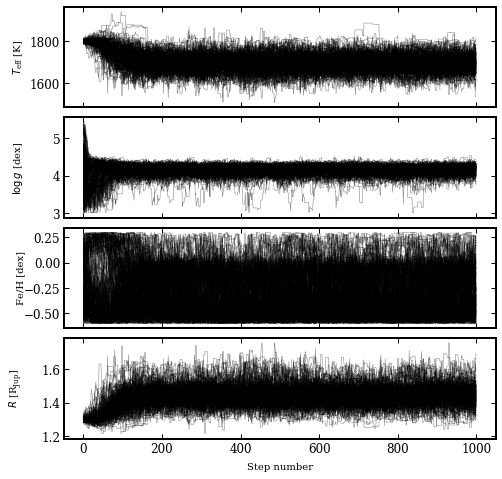

In [10]:
Image('walkers.png')

In [11]:
species.plot_posteriors(tag='betapic',
                        burnin=500,
                        offset=(-0.25, -0.25),
                        limits=[(1500., 1920.), (3.4, 4.7), (-0.6, 0.3), (1.1, 1.8)],
                        output='posteriors.png')

Median sample:
   - teff = 1694.56
   - logg = 4.17
   - feh = -0.36
   - radius = 1.44
   - distance = 19.75
Plotting posteriors: posteriors.png... [DONE]


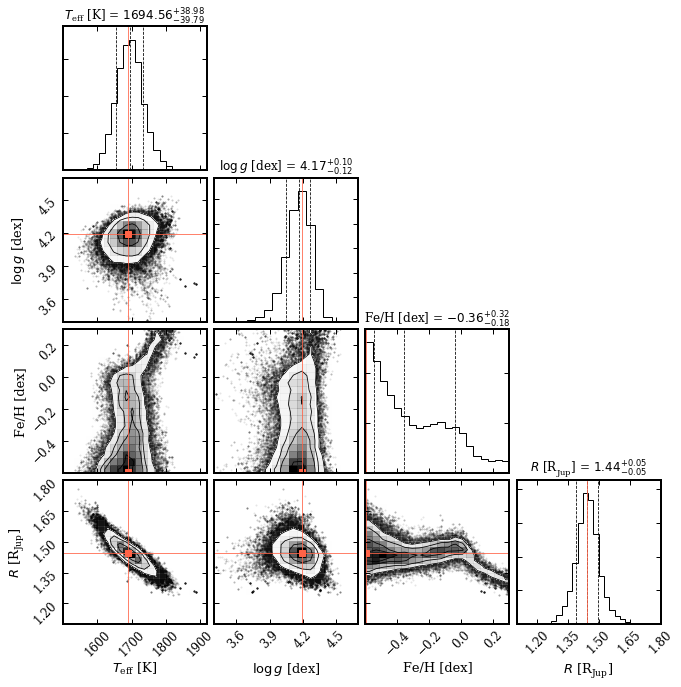

In [12]:
Image('posteriors.png')

In [13]:
samples = database.get_mcmc_spectra(tag='betapic',
                                    burnin=500,
                                    random=30,
                                    wavel_range=(0.7, 6.5),
                                    spec_res=50.)

Getting MCMC spectra:   0%|          | 0/30 [00:00<?, ?it/s]

The smooth_spectrum function has not been fully tested. [WARNING]


Getting MCMC spectra: 100%|██████████| 30/30 [05:46<00:00, 11.54s/it]


In [14]:
median = database.get_median_sample(tag='betapic',
                                    burnin=500)

In [15]:
read_model = species.ReadModel(model='drift-phoenix',
                               wavel_range=(0.7, 6.5))

In [16]:
modelbox = read_model.get_model(model_param=median,
                                spec_res=50.)

In [17]:
modelbox = species.add_luminosity(modelbox)

In [18]:
residuals = species.get_residuals(datatype='model',
                                  spectrum='drift-phoenix',
                                  parameters=median,
                                  filters=None,
                                  objectbox=objectbox,
                                  inc_phot=True,
                                  inc_spec=False)

Calculating synthetic photometry... [DONE]
Calculating residuals... [DONE]
Residuals [sigma]:
   - Gemini/NICI.ED286: 0.68
   - LCO/VisAO.Ys: 0.70
   - Paranal/NACO.H: -0.30
   - Paranal/NACO.J: 0.28
   - Paranal/NACO.Ks: -0.39
   - Paranal/NACO.Lp: -2.10
   - Paranal/NACO.Mp: 0.04
   - Paranal/NACO.NB374: -0.45
   - Paranal/NACO.NB405: 1.56


In [19]:
synphot = species.multi_photometry(datatype='model',
                                   spectrum='drift-phoenix',
                                   filters=objectbox.filters,
                                   parameters=median)

Calculating synthetic photometry... [DONE]


In [20]:
species.plot_spectrum(boxes=[samples, modelbox, objectbox, synphot],
                      filters=objectbox.filters,
                      residuals=residuals,
                      colors=('gray', 'tomato', ('black', None), 'black'),
                      xlim=(0.7, 6.0),
                      ylim=(-1.2e-15, 1.3e-14),
                      scale=('linear', 'linear'),
                      offset=(-0.25, -0.06),
                      output='spectrum.png')

Plotting spectrum: spectrum.png... [DONE]


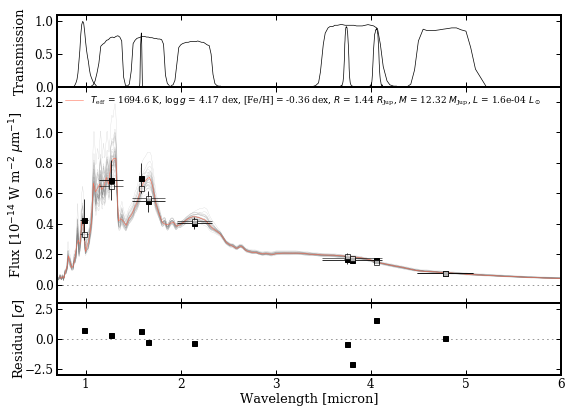

In [21]:
Image('spectrum.png')